# **Project Title - Book Recommendation System**

**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

* Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

* Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**Importing Libraries**

In [1]:
#importing libraries required for EDA
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date, datetime
from nltk.corpus import stopwords

In [2]:
#loading user dataset
user_df = pd.read_csv('Users.csv')
#first five records of user data
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
#size of the user dataset
user_df.shape

(278858, 3)

**Data Cleaning**

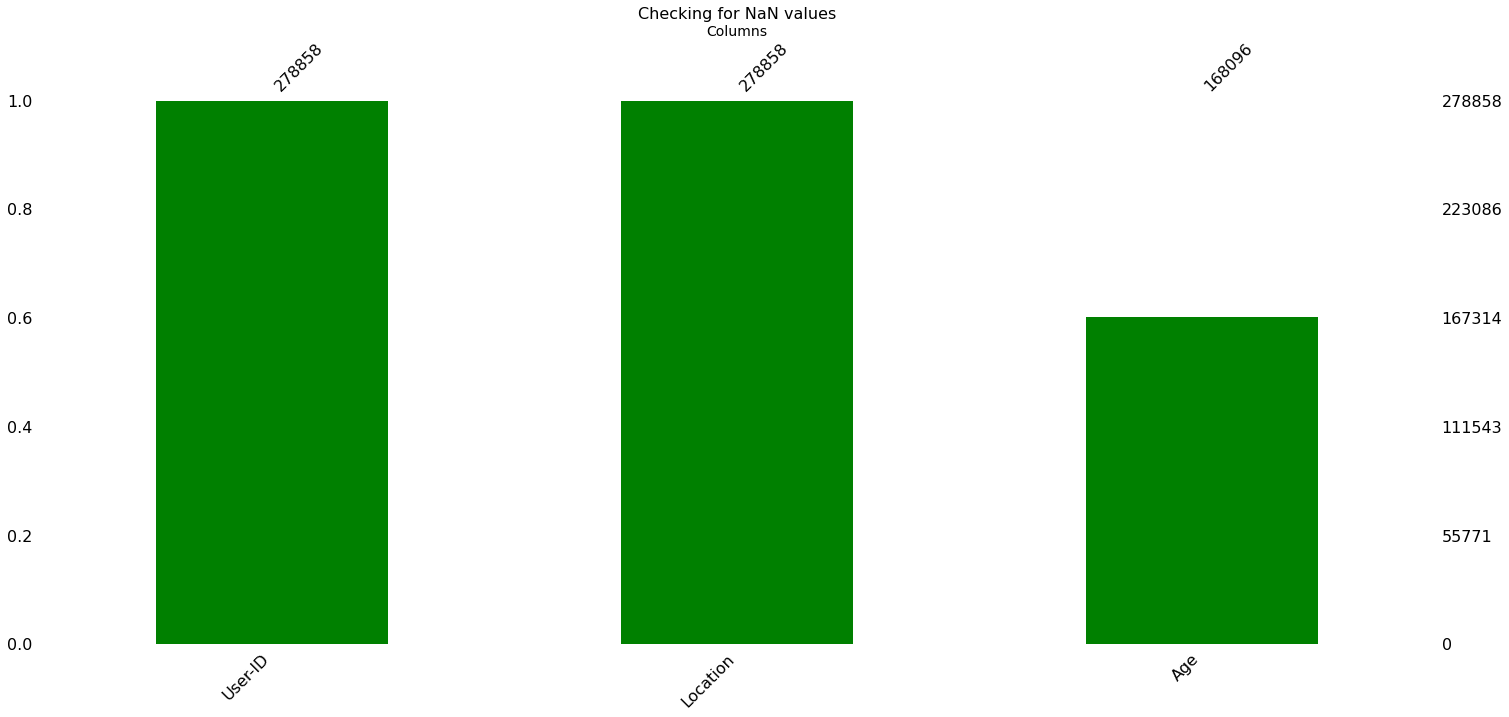

In [4]:
#checking for null values
msno.bar(user_df, color='green')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [5]:
#number of null values present in the datset
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [6]:
#filling the nan values with mean of the feature
user_df['Age'].fillna(user_df['Age'].mean(), inplace=True)

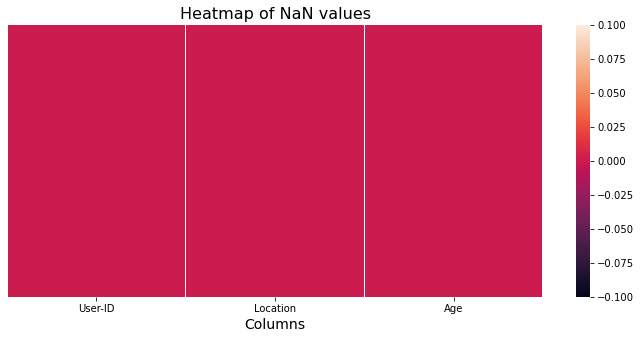

In [7]:
#heatmap of data frame
plt.figure(figsize=(12, 5))
sns.heatmap(user_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [8]:
#number of unique values 
user_df.nunique()

User-ID     278858
Location     57339
Age            166
dtype: int64

**Analysis on Location Feature**

In [9]:
#analysis of location feature
#dictionary of location
location_dict = {}

#extracting the words
for loc in user_df['Location']:
    for name in loc.split(', '):
        if name in location_dict:
            location_dict[name] = location_dict[name]+1
        else:
            location_dict[name] = 1

In [10]:
#dataframe of location and their counts
location_df = pd.DataFrame(location_dict.items(), columns=['Location', 'Count']).sort_values('Count', ascending=False)
#frequent locations
location_df.head()

,Location,Count
2,usa,139737
19,canada,21668
4,california,19896
13,united kingdom,18592
48,germany,17088


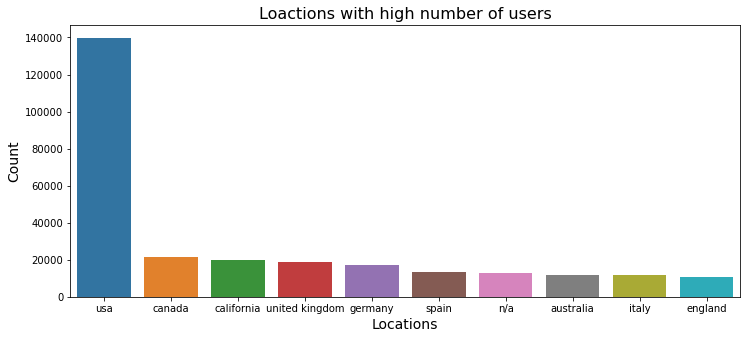

In [11]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=location_df['Location'][:10], y=location_df['Count'][:10])
plt.title('Loactions with high number of users', size=16)
plt.xlabel('Locations', size=14)
plt.ylabel('Count', size=14)
plt.show()

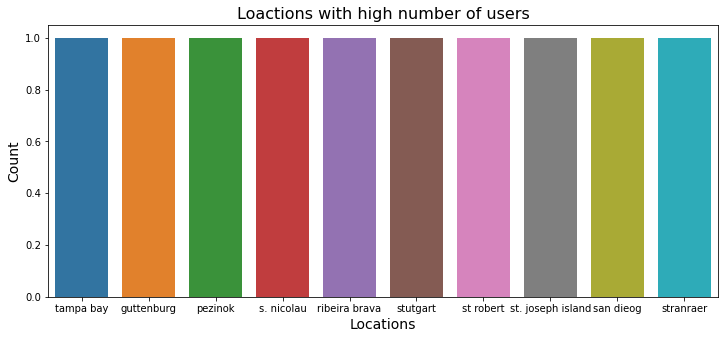

In [12]:
#plotting of Loacations of users
plt.figure(figsize=(12, 5))
sns.barplot(x=location_df['Location'][-10:], y=location_df['Count'][-10:])
plt.title('Loactions with high number of users', size=16)
plt.xlabel('Locations', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Analysis of Age**

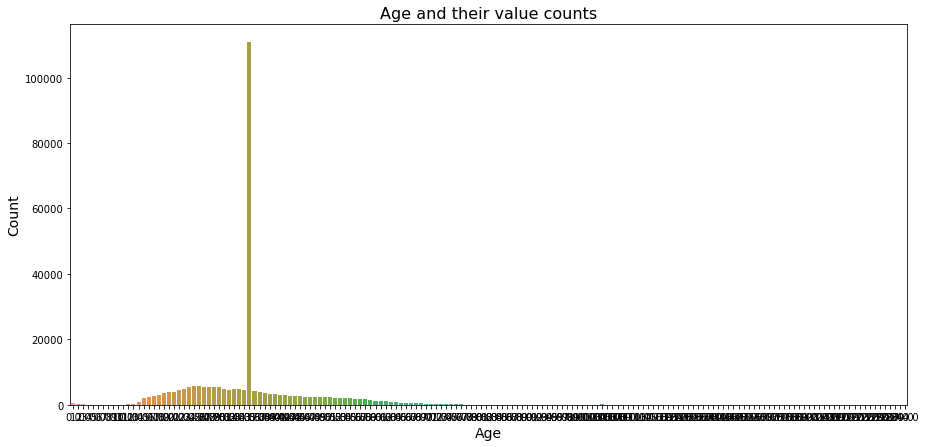

In [13]:
#plotting the time type data
plt.figure(figsize=(15, 7))
sns.countplot(user_df['Age'])
plt.title('Age and their value counts', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()